<a href="https://colab.research.google.com/github/ExpectoX1/CV-DL/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Kaggle

In [1]:
#https://www.kaggle.com/paultimothymooney/blood-cells
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 5.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp37-none-any.whl size=73269 sha256=172523523963ef3ab6fe6394f9c4d3f12bd64802cbe2d6d7fe051122c233f40a
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"expectox1","key":"35a655b48ca11f9b324829f9b921e090"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d paultimothymooney/blood-cells

100% 108M/108M [00:01<00:00, 76.2MB/s] 
100% 108M/108M [00:01<00:00, 86.9MB/s]


In [6]:
!unzip blood-cells.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8050.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8167.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8283.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8324.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8379.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8577.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8587.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8655.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8701.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_872.jpeg  
  inflating: dataset/dataset2-

##CNN

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [8]:
training_path="/content/dataset/dataset2-master/dataset2-master/images/TRAIN"
test_path="/content/dataset/dataset2-master/dataset2-master/images/TEST"

In [9]:
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(training_path,image_size=(200,200),batch_size=32)

Found 9957 files belonging to 4 classes.


In [10]:
test_dataset=tf.keras.preprocessing.image_dataset_from_directory(test_path,image_size=(200,200),batch_size=32)

Found 2487 files belonging to 4 classes.


In [11]:
CNNmodel = tf.keras.models.Sequential()
#first conv layer
CNNmodel.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200, 3)))
CNNmodel.add(tf.keras.layers.MaxPooling2D(2,2))
CNNmodel.add(tf.keras.layers.BatchNormalization())
#second conv layer
CNNmodel.add(tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu'))
CNNmodel.add(tf.keras.layers.MaxPooling2D(2,2))
CNNmodel.add(tf.keras.layers.Dropout(0.5))
#third conv layer
CNNmodel.add(tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu'))
CNNmodel.add(tf.keras.layers.MaxPooling2D(2,2))
CNNmodel.add(tf.keras.layers.Dropout(0.5))
#fourth conv layer
CNNmodel.add(tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu'))
CNNmodel.add(tf.keras.layers.MaxPooling2D(2,2))
CNNmodel.add(tf.keras.layers.Dropout(0.4))
#fifth conv layer
CNNmodel.add(tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu'))
CNNmodel.add(tf.keras.layers.MaxPooling2D(2,2))
CNNmodel.add(tf.keras.layers.Dropout(0.4))
#sixth conv layer
CNNmodel.add(tf.keras.layers.Conv2D(128, (3, 3), activation= 'relu'))
CNNmodel.add(tf.keras.layers.MaxPooling2D(2,2))
CNNmodel.add(tf.keras.layers.Dropout(0.3))

# Neural Network - For classification
CNNmodel.add(tf.keras.layers.Flatten())
CNNmodel.add(tf.keras.layers.Dense(128, activation='relu'))
CNNmodel.add(tf.keras.layers.Dropout(0.5))
CNNmodel.add(tf.keras.layers.Dense(64, activation='relu'))
CNNmodel.add(tf.keras.layers.Dropout(0.3))
CNNmodel.add(tf.keras.layers.Dense(4,activation='softmax'))



In [12]:
CNNmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 99, 99, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        3

In [13]:
CNNmodel.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ['accuracy'])

In [14]:
history = CNNmodel.fit(train_dataset, validation_data=test_dataset, epochs = 20 )

Epoch 1/20
312/312 [==============================] - 59s 81ms/step - loss: 1.4638 - accuracy: 0.2373 - val_loss: 1.3861 - val_accuracy: 0.2505
Epoch 2/20
312/312 [==============================] - 24s 77ms/step - loss: 1.3878 - accuracy: 0.2510 - val_loss: 1.3851 - val_accuracy: 0.2718
Epoch 3/20
312/312 [==============================] - 26s 82ms/step - loss: 1.3768 - accuracy: 0.2666 - val_loss: 1.3058 - val_accuracy: 0.2831
Epoch 4/20
312/312 [==============================] - 26s 82ms/step - loss: 1.1652 - accuracy: 0.4276 - val_loss: 0.9855 - val_accuracy: 0.4765
Epoch 5/20
312/312 [==============================] - 26s 81ms/step - loss: 0.9884 - accuracy: 0.4839 - val_loss: 0.7563 - val_accuracy: 0.6462
Epoch 6/20
312/312 [==============================] - 26s 82ms/step - loss: 0.7689 - accuracy: 0.6399 - val_loss: 0.6291 - val_accuracy: 0.6775
Epoch 7/20
312/312 [==============================] - 25s 81ms/step - loss: 0.6268 - accuracy: 0.6827 - val_loss: 0.7623 - val_accuracy:

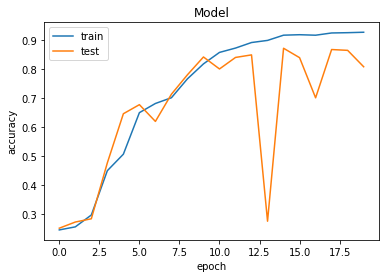

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

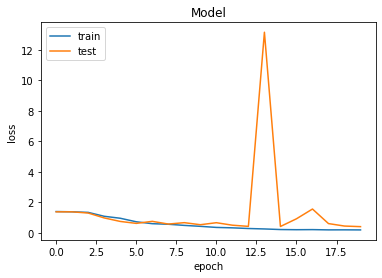

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
!mkdir -p saved_model
CNNmodel.save('saved_model/my_model') 